In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [5]:
mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images=training_images/255.0
testing_images=testing_images/255.0
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
model.fit(training_images,training_labels,epochs=5)
test_loss=model.evaluate(test_images,test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


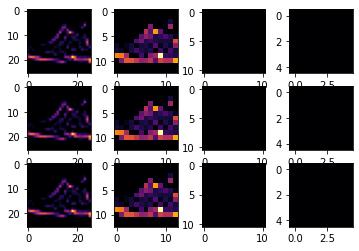

In [11]:
import matplotlib.pyplot as plt
f,axs=plt.subplots(3,4)
convolution_number=1
from tensorflow.keras import models
layer_output=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
for x in range(0,4):
  f1=activation_model.predict(test_images[0].reshape(1,28,28,1))[x]
  axs[0,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
  axs[0,x].grid(False)
  f2=activation_model.predict(test_images[7].reshape(1,28,28,1))[x]
  axs[1,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
  axs[1,x].grid(False)
  f3=activation_model.predict(test_images[26].reshape(1,28,28,1))[x]
  axs[2,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
  axs[2,x].grid(False)

In [12]:
model1=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.summary()
model1.fit(training_images,training_labels,epochs=5)
test_loss=model1.evaluate(test_images,test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5030 - accuracy: 0.8227
Epoch 2